In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
def calculateInertia(points, kmax):
    inertia = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_inertia = 0
        
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_point = points.iloc[i]
            
            for p1, p2 in zip(curr_center, curr_point):
                curr_inertia += (p1-p2)**2
        
        inertia.append(curr_inertia)
    
    return inertia

In [7]:
inertia = calculateInertia(df, 10)

In [8]:
inertia

[681.3705999999991,
 152.3479517603581,
 78.85144142614608,
 57.228473214285756,
 46.44618205128214,
 39.03998724608729,
 34.29822966507181,
 29.990426406926414,
 28.116586863428957,
 26.199972852404475]

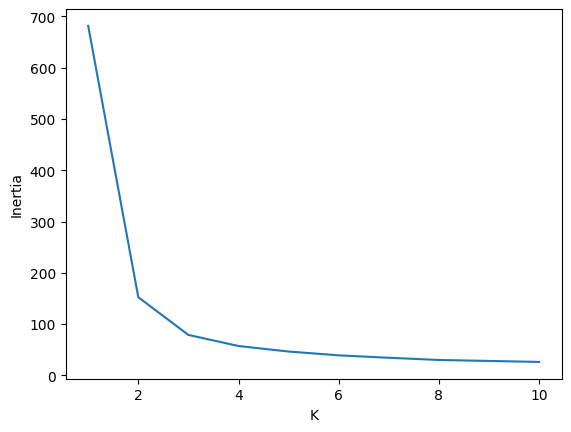

In [9]:
plt.plot([x for x in range(1, len(inertia)+1)] ,inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3).fit(df)
preds = kmeans.predict(df)

In [11]:
pca = PCA(n_components=3).fit(df)

In [12]:
tdf = pca.transform(df)

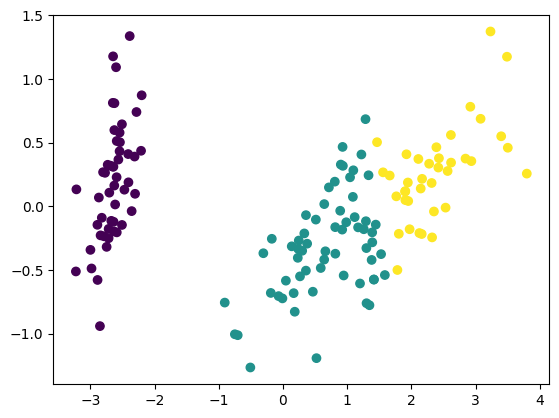

In [14]:
plt.scatter(tdf[:, 0], tdf[:, 1], c=kmeans.labels_)

In [19]:
# Internal measures
print(silhouette_score(df, kmeans.labels_))
print(calinski_harabasz_score(df, kmeans.labels_))
print(davies_bouldin_score(df, kmeans.labels_))

0.5528190123564095
561.62775662962
0.6619715465007465


In [57]:
# BIRCH

In [30]:
from sklearn.cluster import Birch

In [31]:
def calculateSilhoutteScore(df, kmax):
    sse = []
    for k in range(2, kmax+1):
        birch = Birch(n_clusters=k, compute_labels=True).fit(df)
        sse.append(silhouette_score(df, birch.labels_))
    return sse

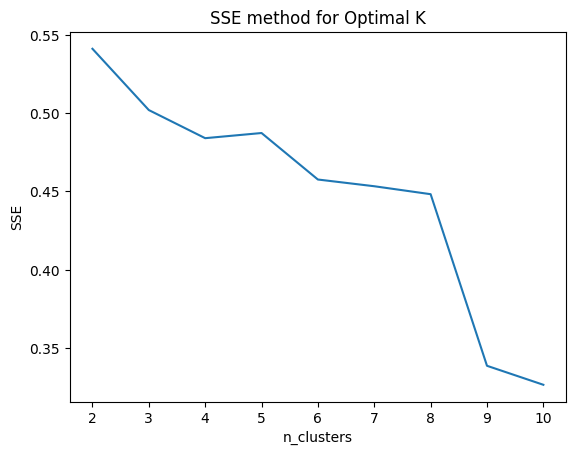

In [32]:
plt.plot(range(2, 11), calculateSilhoutteScore(df, 10))
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.title("SSE method for Optimal K")
plt.show()

In [36]:
birch = Birch(n_clusters=2, compute_labels=True).fit(df)

In [37]:
pca1 = PCA(n_components=2).fit(df).transform(df)

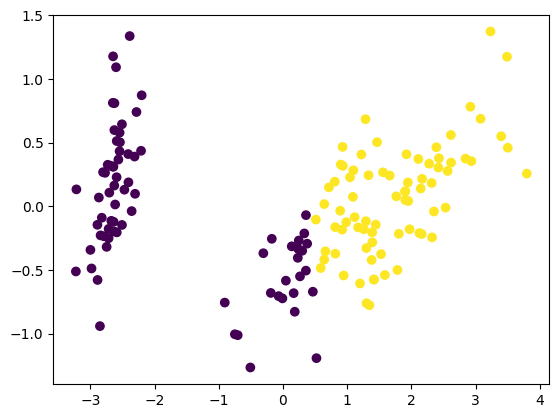

In [38]:
plt.scatter(pca1[:, 0], pca1[:, 1], c=birch.labels_)

In [41]:
print("Silhouette_score: ", silhouette_score(df, birch.labels_))
print("Calinski_Harabasz_score", calinski_harabasz_score(df, birch.labels_))
print("Davies_Bouldin_score", davies_bouldin_score(df, birch.labels_))

Silhouette_score:  0.5410792788429797
Calinski_Harabasz_score 311.53243610630295
Davies_Bouldin_score 0.6268954976991481


In [56]:
# AGGLOMERATIVE

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
def calculateSilhoutteScore(df, kmax):
    sse = []
    for k in range(2, kmax+1):
        agglo = AgglomerativeClustering(n_clusters=k, distance_threshold=None).fit(df)
        sse.append(silhouette_score(df, agglo.labels_))
    return sse

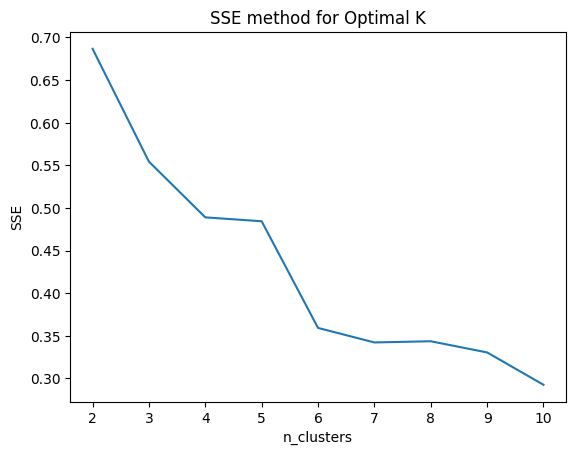

In [45]:
plt.plot(range(2, 11), calculateSilhoutteScore(df, 10))
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.title("SSE method for Optimal K")
plt.show()

In [46]:
agglo = AgglomerativeClustering(n_clusters=2, distance_threshold=None).fit(df)


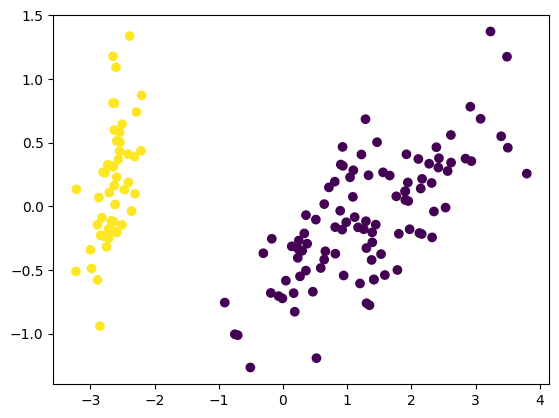

In [47]:
plt.scatter(pca1[:, 0], pca1[:, 1], c=agglo.labels_)

In [50]:
print("Silhouette_score: ", silhouette_score(df, agglo.labels_))
print("Calinski_Harabasz_score", calinski_harabasz_score(df, agglo.labels_))
print("Davies_Bouldin_score", davies_bouldin_score(df, agglo.labels_))

Silhouette_score:  0.6867350732769776
Calinski_Harabasz_score 502.82156350235897
Davies_Bouldin_score 0.38275284210068616


In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

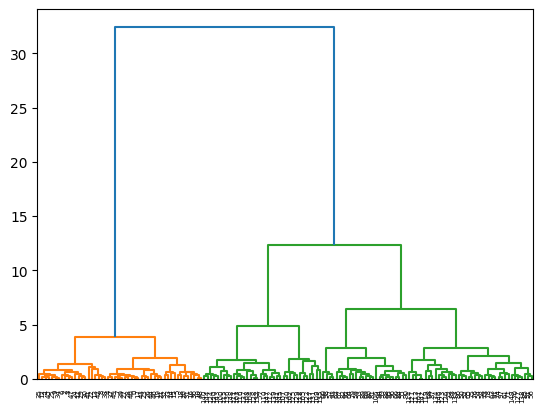

In [54]:
dendrogram((linkage(df, method='ward')))

In [55]:
# DBSCAN

In [59]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [62]:
MIN_PTS = 2*df.shape[1]

nearest_neighbours = NearestNeighbors(n_neighbors=MIN_PTS)
neighbors = nearest_neighbours.fit(df)
dist, indices = neighbors.kneighbors(df)

In [64]:
dist = np.sort(dist[:, MIN_PTS-1], axis=0)

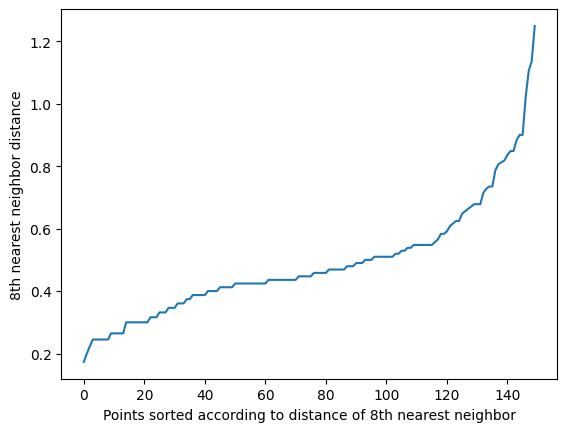

In [66]:
plt.plot(dist)
plt.xlabel("Points sorted according to distance of "+str(MIN_PTS)+"th nearest neighbor")
plt.ylabel(str(MIN_PTS)+"th nearest neighbor distance")
plt.show()

In [78]:
dbscan = DBSCAN(min_samples=MIN_PTS, eps=0.875).fit(df)
labels = dbscan.labels_

n_clusters = len(set(labels))- (1 if -1 in set(labels) else 0)
n_noise_ = list(labels).count(-1)

print(f"Clusters : {n_clusters}")
print(f"Noise Points: {n_noise_}")

Clusters : 2
Noise Points: 1


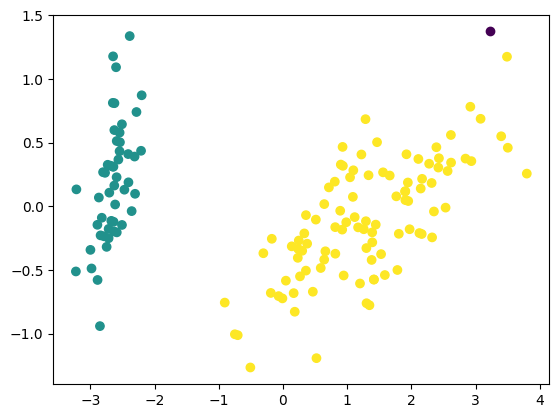

In [79]:
plt.scatter(pca1[:, 0], pca1[:, 1], c=dbscan.labels_)

In [80]:
# Divisive

In [81]:
!pip install HiPart

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.4/553.4 KB 9.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.4 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 13.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)


In [82]:
from HiPart.clustering import DePDDP
from HiPart.visualizations import dendrogram_visualization

In [89]:
def calculateSilhoutteScore(df, kmax):
    sse = []
    for k in range(2, kmax+1):
        depddp = DePDDP(max_clusters_number=k).fit(df.values)
        sse.append(silhouette_score(df, depddp.labels_))
    return sse

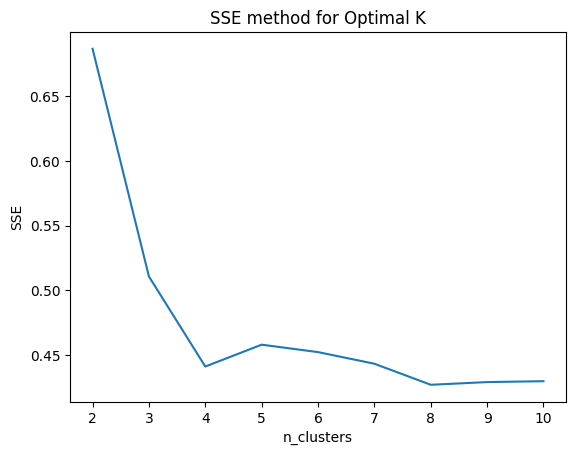

In [90]:
plt.plot(range(2, 11), calculateSilhoutteScore(df, 10))
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.title("SSE method for Optimal K")
plt.show()

In [ ]:
depddp = De

In [91]:
plt.scatter(pca1[:, 0], pca1[:, 1], c=depddp.labels_)

NameError: name 'depddp' is not defined